# 

# **ARIMA and Seasonal ARIMA** # 
## Autoregressive Integrated Moving Averages ##
The general process for ARIMA models is the following:

* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

df=pd.read_csv('/kaggle/input/sales-dataset/perrin-freres-monthly-champagne-.csv')

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
##Cleaning the up the last row as it is inconsistent
df.columns=["Month", "Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
## Dropping the last two row as it is inconsistent
df.drop([106,105], axis=0, inplace=True)

In [8]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [10]:
df.set_index('Month', inplace=True)

In [11]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [12]:
#Getting the information about the dataset
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## **Visualizing Data** ##

<Axes: xlabel='Month'>

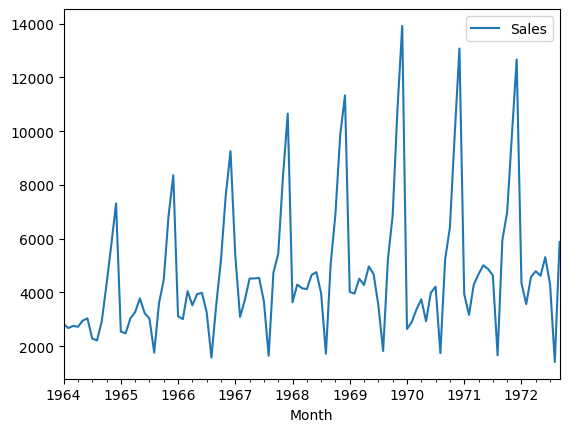

In [13]:
df.plot()

**At a high level, this time series data for "Sales" is characterized by three primary components:**
* A strong upward trend, indicating consistent growth over the years.
* A very clear and strong yearly seasonality, suggesting sales are heavily influenced by a specific time of year.
* An increasing variance, meaning the fluctuations in sales are becoming more extreme over time.

Due to these characteristics, the time series is non-stationary and exhibits a multiplicative pattern.

In [14]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result =  adfuller(df['Sales'])

In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [16]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276202
p-value : 0.36391577166024636
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing ##

In [17]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [18]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [19]:
df.head(14)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [20]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

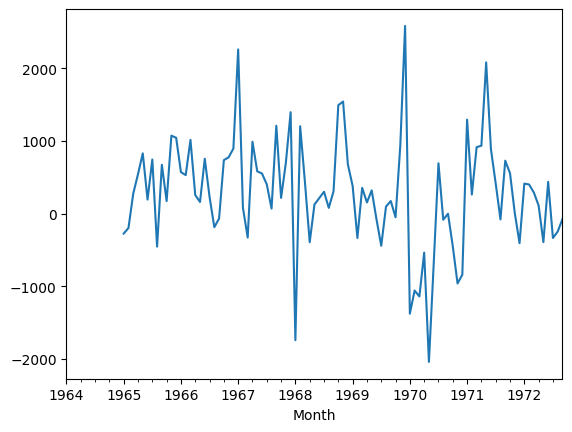

In [21]:
df['Seasonal First Difference'].plot()

# **Auto Regressive Model** # 
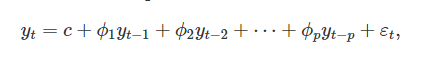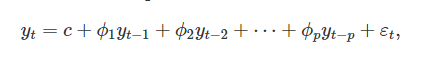

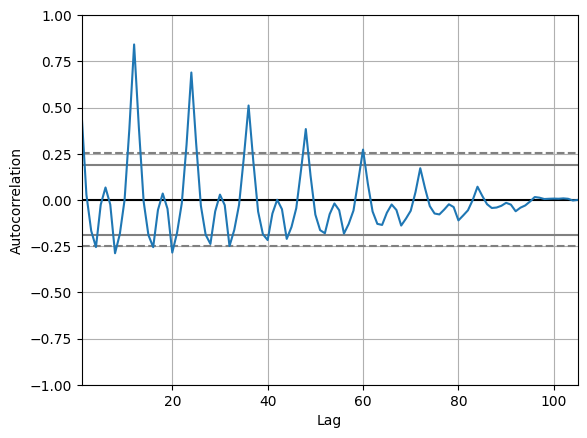

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

# **Final Thoughts on Autocorrelation and Partial Autocorrelation** # 
* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
 
 p,d,q p AR model lags d differencing q MA lags

In [23]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

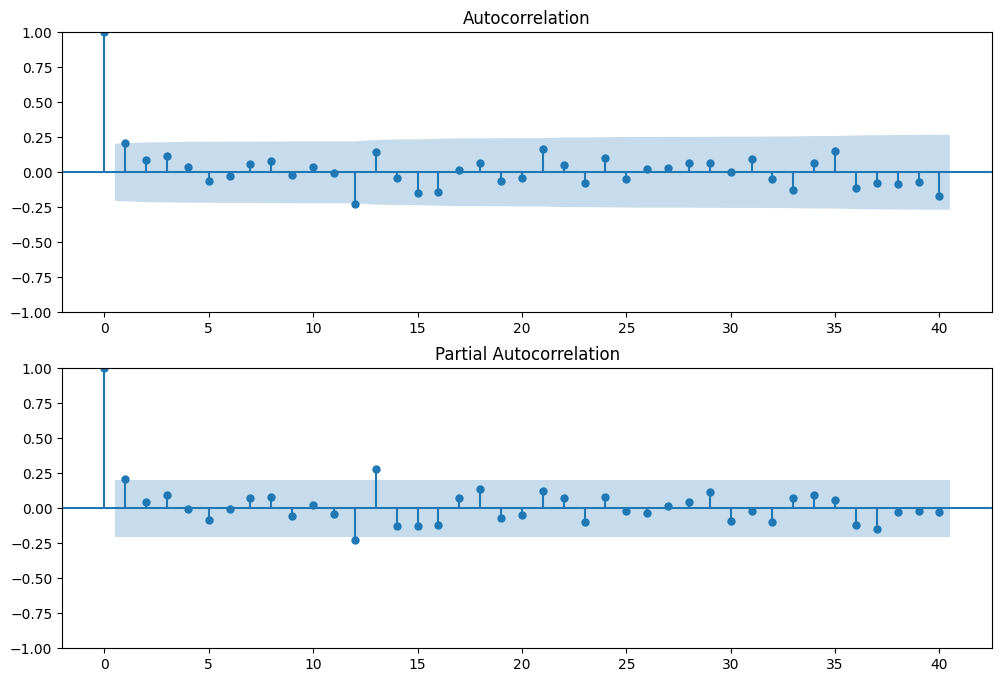

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [25]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [26]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Thu, 16 Oct 2025   AIC                           1911.627
Time:                        10:36:45   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

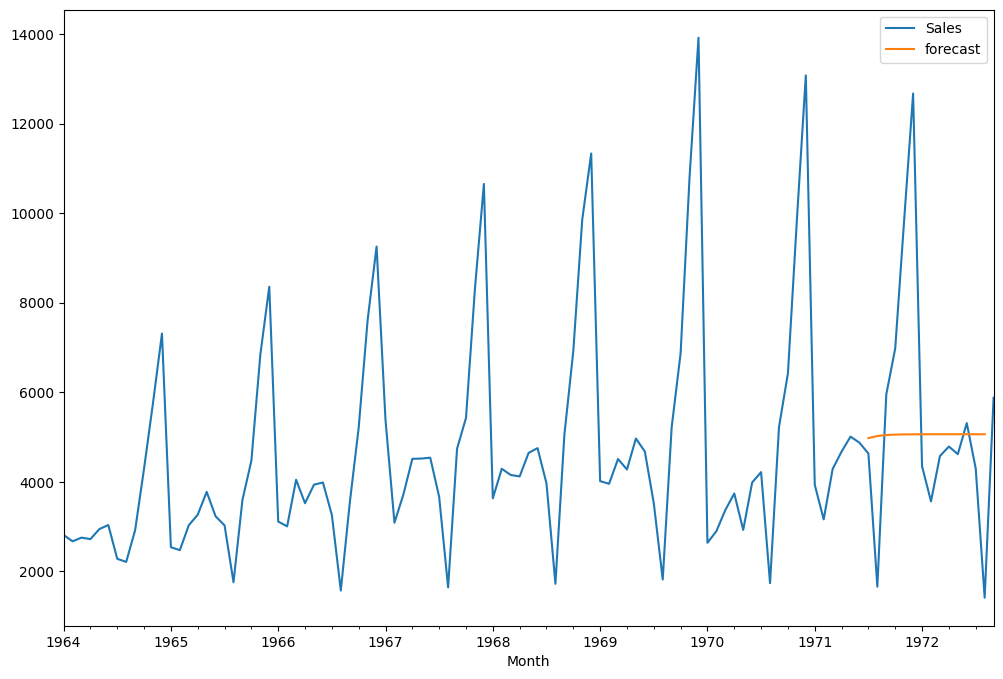

In [28]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [29]:
import statsmodels.api as sm

In [57]:
sarima_model = sm.tsa.statespace.SARIMAX(y_train, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
sarima_predictions = sarima_results.predict(start=y_test.index[0], 
                                            end=y_test.index[-1], 
                                            dynamic=True)|

SyntaxError: invalid syntax (1433503580.py, line 3)

<Axes: xlabel='Month'>

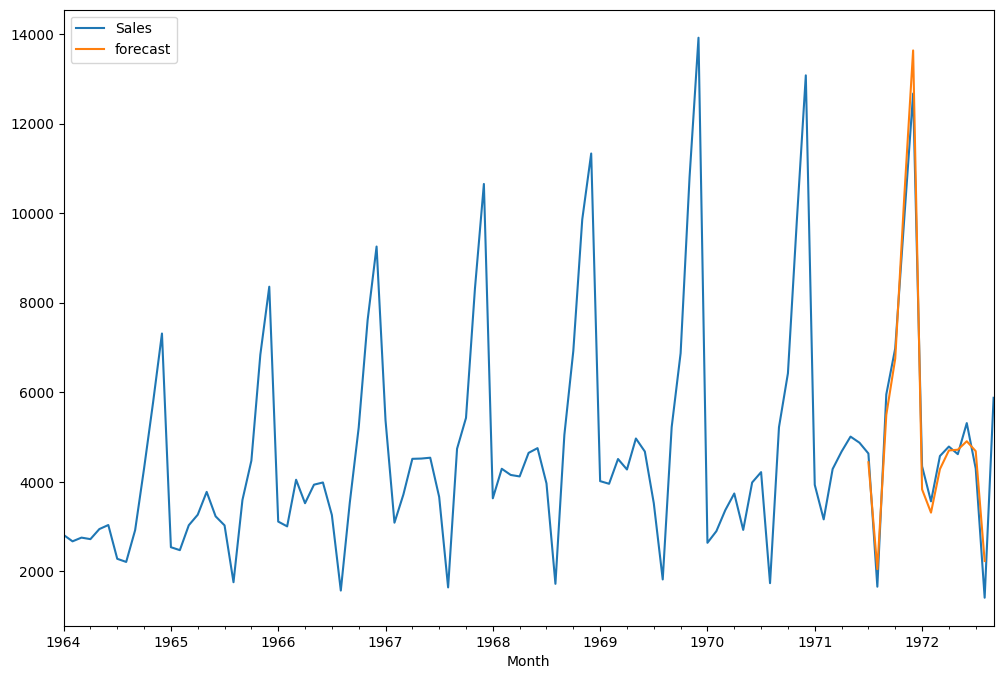

In [31]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [32]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [33]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [34]:
future_datest_df.tail()
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


/tmp/ipykernel_95/3573533814.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


<Axes: >

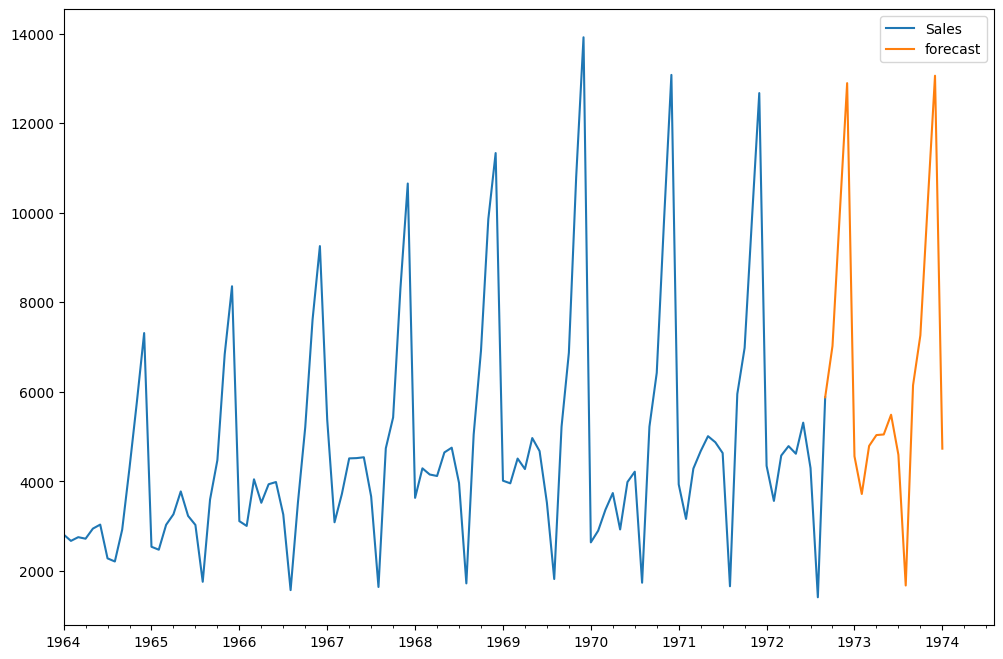

In [35]:
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

In [36]:
df_ml= df.copy()

In [37]:
#dropping unnecessary columns 
df_ml= df_ml[['Sales']].copy()

In [38]:
#creating time based features
df_ml['month'] = df_ml.index.month
df_ml['year'] = df_ml.index.year
df_ml['quarter'] = df_ml.index.quarter


In [39]:
#creatiing lag feature(Sales from previous periods)
# Lag 1: Sales from the previous month
df_ml['lag_1']= df_ml['Sales'].shift(1)
# Lag 12: Sales from the same month last year (to capture seasonality)
df_ml['lag_12'] = df_ml['Sales'].shift(12)

In [40]:
# Create rolling window features
df_ml['rolling_mean_3'] = df_ml['Sales'].shift(1).rolling(window=3).mean()
df_ml['rolling_std_3'] = df_ml['Sales'].shift(1).rolling(window=3).std()

In [41]:
# Drop rows with NaN values created by lags and rolling features
df_ml.dropna(inplace=True)

In [42]:
print("DataFrame with new features:")
print(df_ml.head())

DataFrame with new features:
             Sales  month  year  quarter   lag_1  lag_12  rolling_mean_3  \
Month                                                                      
1965-01-01  2541.0      1  1965        1  7312.0  2815.0     5792.333333   
1965-02-01  2475.0      2  1965        1  2541.0  2672.0     5205.666667   
1965-03-01  3031.0      3  1965        1  2475.0  2755.0     4109.333333   
1965-04-01  3266.0      4  1965        2  3031.0  2721.0     2682.333333   
1965-05-01  3776.0      5  1965        2  3266.0  2946.0     2924.000000   

            rolling_std_3  
Month                      
1965-01-01    1505.699948  
1965-02-01    2434.011572  
1965-03-01    2773.787002  
1965-04-01     303.752092  
1965-05-01     406.210537  


In [44]:
# ### 2. Train-Test Split
# For time series, we split the data chronologically.
# We'll train on data up to a certain point and test on the data that comes after.
X= df_ml.drop('Sales', axis=1)
y = df_ml['Sales']


In [45]:
# Set a split point (e.g., use the last 1.5 years for testing)
split_point = len(df_ml) - 18
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]



# **Using Linear Regression for predicting** # 


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [47]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions=lr_model.predict(X_test)
lr_mae= mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression MAE: {lr_mae:.2f}")

Linear Regression MAE: 693.14


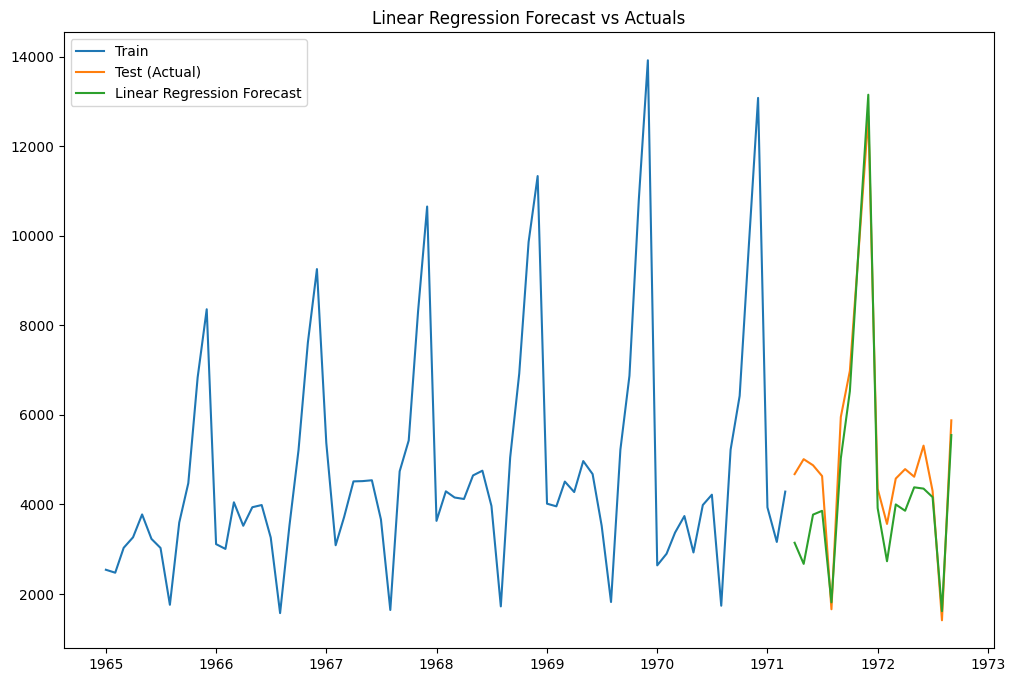

In [48]:
# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test (Actual)')
plt.plot(y_test.index, lr_predictions, label='Linear Regression Forecast')
plt.title('Linear Regression Forecast vs Actuals')
plt.legend()
plt.show()

# **XGBoost Regressor** #

XGBoost MAE: 649.47


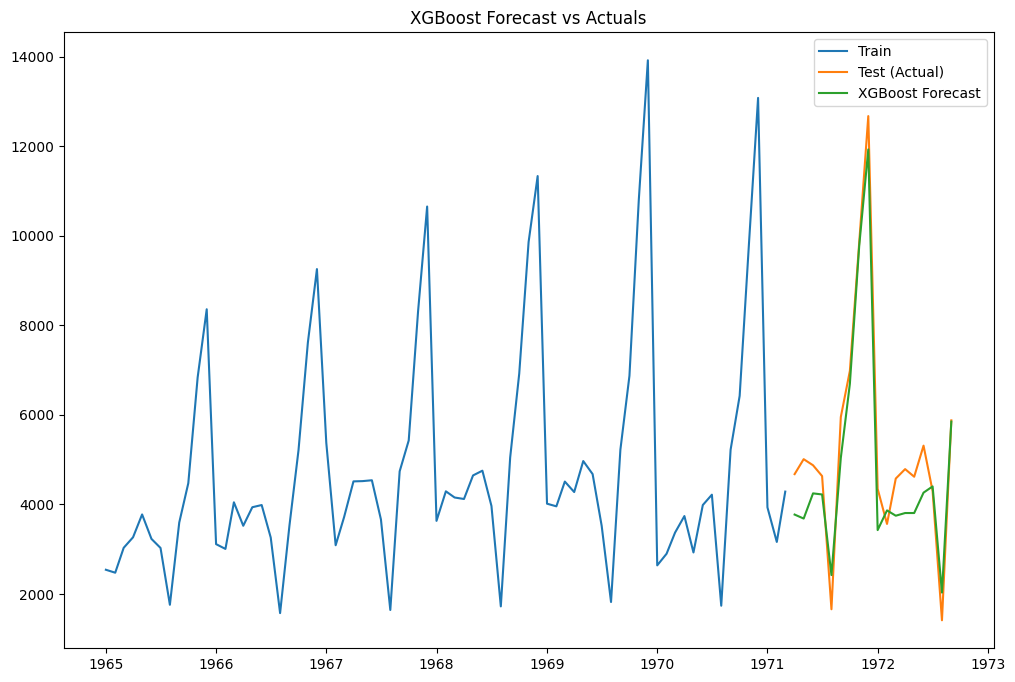

In [50]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, early_stopping_rounds=10)
xgb_model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              verbose=False)
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print(f"XGBoost MAE: {xgb_mae:.2f}")

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test (Actual)')
plt.plot(y_test.index, xgb_predictions, label='XGBoost Forecast')
plt.title('XGBoost Forecast vs Actuals')
plt.legend()
plt.show()

# **LightGBM Regressor** #

In [52]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(objective='regression', n_estimators=1000, learning_rate=0.05)
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)
lgb_mae = mean_absolute_error(y_test, lgb_predictions)
print(f"LightGBM MAE: {lgb_mae:.2f}")



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 75, number of used features: 7
[LightGBM] [Info] Start training from score 4841.106667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

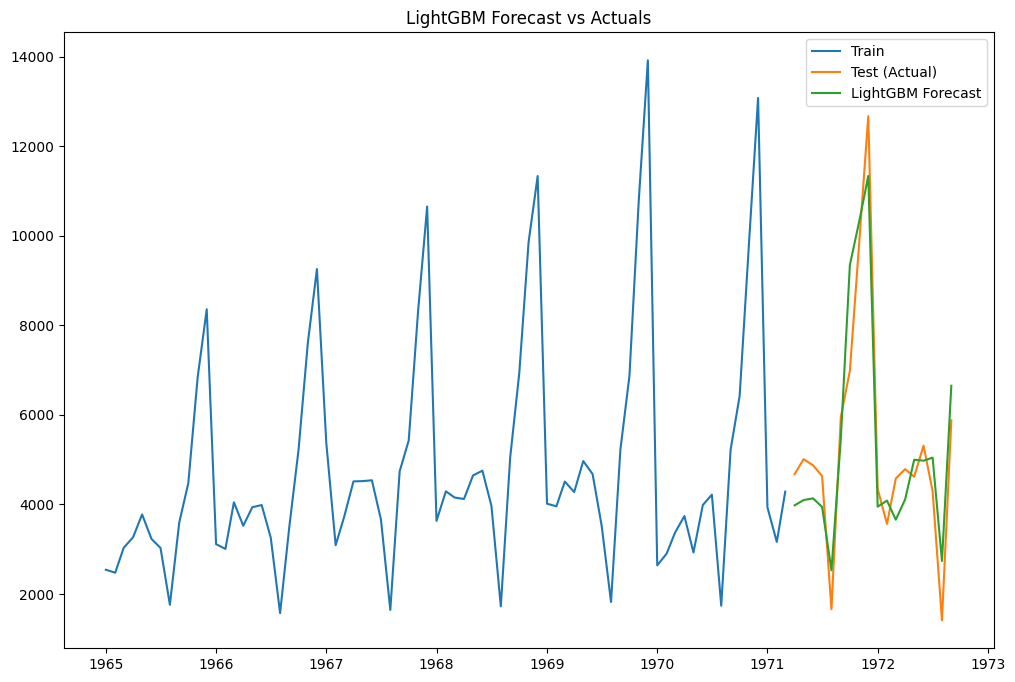

In [53]:
# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test (Actual)')
plt.plot(y_test.index, lgb_predictions, label='LightGBM Forecast')
plt.title('LightGBM Forecast vs Actuals')
plt.legend()
plt.show()


# **Quantile Regression (with LightGBM)** #

In [54]:
# This is a powerful technique for understanding the uncertainty in our forecast.
# We will predict the 10th percentile (worst-case), 50th (median), and 90th (best-case).
# Model for the lower quantile (10%)
lgb_lower = lgb.LGBMRegressor(objective='quantile', alpha=0.1)
lgb_lower.fit(X_train, y_train)
lower_preds = lgb_lower.predict(X_test)

# Model for the median (50%)
lgb_median = lgb.LGBMRegressor(objective='quantile', alpha=0.5)
lgb_median.fit(X_train, y_train)
median_preds = lgb_median.predict(X_test)

# Model for the upper quantile (90%)
lgb_upper = lgb.LGBMRegressor(objective='quantile', alpha=0.9)
lgb_upper.fit(X_train, y_train)
upper_preds = lgb_upper.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 75, number of used features: 7
[LightGBM] [Info] Start training from score 2580.199951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

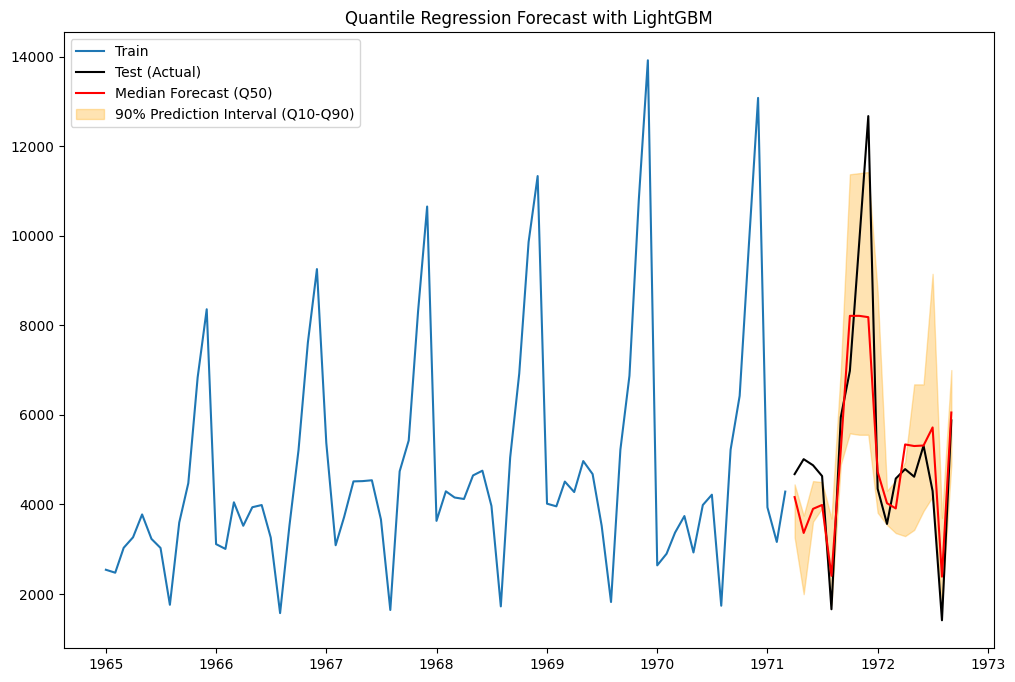

In [55]:
# Plotting the quantile forecast
plt.figure(figsize=(12, 8))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test (Actual)', color='black')
plt.plot(y_test.index, median_preds, label='Median Forecast (Q50)', color='red')
plt.fill_between(y_test.index, lower_preds, upper_preds, color='orange', alpha=0.3, label='90% Prediction Interval (Q10-Q90)')
plt.title('Quantile Regression Forecast with LightGBM')
plt.legend()
plt.show()


--- Comparing All Models ---


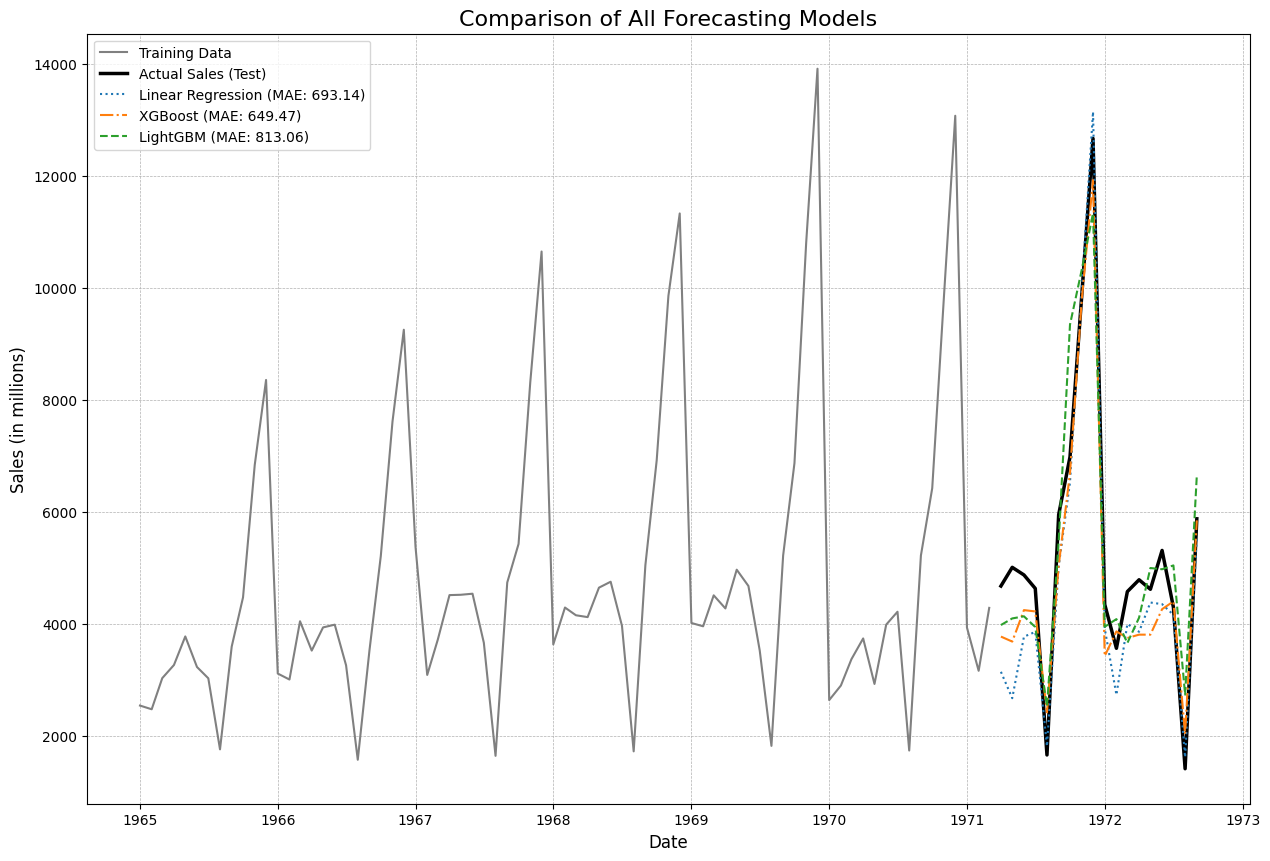

In [62]:
print("\n--- Comparing All Models ---")

# Create a comparison DataFrame
# The index is already correctly set from y_test
comparison_df = pd.DataFrame({
    'Actual Sales': y_test,
    'ARIMA Forecast': df.loc[y_test.index, 'forecast'], # From the first ARIMA model
    
    'Linear Regression': lr_predictions,
    'XGBoost': xgb_predictions,
    'LightGBM': lgb_predictions
})

# Calculate Mean Absolute Error for all models


# Plotting all forecasts on a single graph
plt.figure(figsize=(15, 10))

# Plot training and actual test data
plt.plot(y_train.index, y_train, label='Training Data', color='gray')
plt.plot(y_test.index, y_test, label='Actual Sales (Test)', color='black', linewidth=2.5)

# Plot the forecasts

plt.plot(comparison_df.index, comparison_df['Linear Regression'], label=f'Linear Regression (MAE: {lr_mae:.2f})', linestyle=':')
plt.plot(comparison_df.index, comparison_df['XGBoost'], label=f'XGBoost (MAE: {xgb_mae:.2f})', linestyle='-.')
plt.plot(comparison_df.index, comparison_df['LightGBM'], label=f'LightGBM (MAE: {lgb_mae:.2f})', linestyle='--')


plt.title('Comparison of All Forecasting Models', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales (in millions)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()